In [1]:
import pandas as pd
import numpy as np
import pdb 
from datetime import datetime, timedelta
from dis import dis
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 22})

pd.options.mode.chained_assignment = None  # default='warn'

data = pd.read_csv("prepped_data.csv")

In [2]:
data_per_image = data.groupby(['origin']).mean()
data_per_image = data_per_image.sort_values(by=["score"])

# For malginant and benign images each
images = np.unique(data['origin'])

image_class = []
for i in images:
    tmp_label = data.loc[data['origin'] == i]['current_correct_answer'].iloc[0]
    image_class.append(tmp_label)
    
sort_by_image_id = data_per_image.sort_index()[:len(images)] #sort images by image name
sort_by_image_id['class'] = image_class

# retrieve melanoma and nevus images
melanoma = sort_by_image_id.loc[sort_by_image_id['class']=="['melanoma']"]
nevus = sort_by_image_id.loc[sort_by_image_id['class']=="['nevus']"]

#sort nevus descending and turn negative, melanoma ascending
melanoma.sort_values(by=["score"], inplace = True)
nevus.sort_values(by=["score"], ascending = False, inplace = True)
nevus  = nevus*-1
combined_images = nevus.append(melanoma)

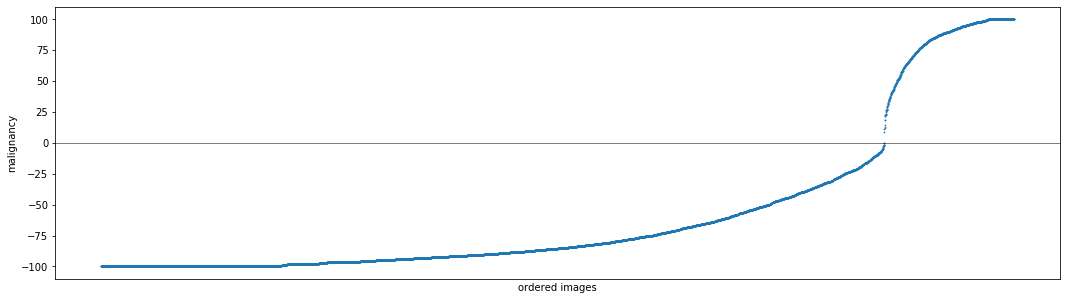

In [3]:
# Malignancy plot
x = combined_images.index
y = combined_images['score']
plt.figure(figsize=(18, 5))
plt.scatter(x,y,s=0.5)
plt.axhline(y=0,linewidth=0.5, color='black')
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)
plt.ylabel('malignancy')
plt.xlabel('ordered images')
plt.show()

In [4]:
# number of malignant images: 1110, min times an image was shown: 95, max: 380:
data['origin'][data['current_correct_answer']== "['melanoma']"].value_counts() 

# number of benign images: 6688, min times an image was shown: 34, max: 106:
data['origin'][data['current_correct_answer']== "['nevus']"].value_counts() 

ISIC_0028136.jpg    106
ISIC_0028675.jpg    102
ISIC_0024894.jpg    102
ISIC_0025653.jpg    101
ISIC_0028800.jpg    101
ISIC_0024784.jpg    101
ISIC_0030269.jpg    101
ISIC_0032801.jpg    101
ISIC_0024392.jpg    100
ISIC_0032161.jpg    100
ISIC_0033558.jpg    100
ISIC_0026445.jpg    100
ISIC_0028171.jpg    100
ISIC_0027697.jpg    100
ISIC_0034152.jpg    100
ISIC_0028571.jpg    100
ISIC_0025735.jpg    100
ISIC_0030336.jpg    100
ISIC_0033075.jpg    100
ISIC_0031453.jpg    100
ISIC_0030886.jpg    100
ISIC_0024988.jpg    100
ISIC_0031074.jpg    100
ISIC_0031813.jpg    100
ISIC_0028753.jpg    100
ISIC_0029842.jpg    100
ISIC_0034083.jpg    100
ISIC_0029965.jpg    100
ISIC_0031273.jpg    100
ISIC_0032084.jpg    100
                   ... 
ISIC_0030483.jpg     38
ISIC_0025993.jpg     38
ISIC_0034286.jpg     38
ISIC_0028874.jpg     38
ISIC_0027902.jpg     38
ISIC_0026863.jpg     38
ISIC_0033091.jpg     38
ISIC_0032047.jpg     38
ISIC_0028446.jpg     38
ISIC_0032492.jpg     38
ISIC_0026533.jpg

In [5]:
malignancy = combined_images['score']
data['malignancy'] = np.nan

for i,n in enumerate(malignancy.index):
    data['malignancy'][data['origin']==n] = malignancy.values[i]   

In [6]:
similarity = data['malignancy'].shift(periods = 1) - data['malignancy'] #previous - current malignancy 
data['similarity_to_previous'] = similarity
data['similarity_bins'] = pd.cut(x=similarity, bins=np.arange(-200,200,10))
data_per_bin = data.groupby(['similarity_bins']).mean()

[0.45456846368008097, 0.4664940754754555, 0.4908233098299461, 0.5074431344527808, 0.5134435748548346, 0.5071212291129303, 0.5011269122604065, 0.49836009777530244, 0.4956463654223969, 0.49552280767518686]
[0.43137254901960786, 0.4601381042059008, 0.4656287909421755, 0.46733372572101234, 0.48248812285935255, 0.4997971602434077, 0.5086569171289292, 0.5057075001915269, 0.5191539805340654, 0.5079738562091504, 0.5075049409753752, 0.5065306852746466, 0.5004097987432838, 0.5013485930893716, 0.4957288509231193, 0.4991360756615842, 0.4948635162899912, 0.4957310212456152, 0.5027352841711592, 0.48844828509703797]


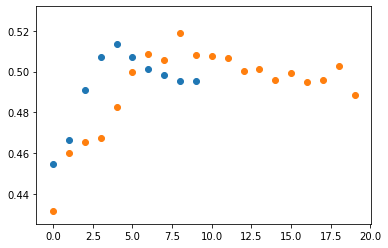

In [24]:
correlation = []
for i in range(10):
    correlation.append(data[((data['malignancy']>-10*(i+1)) & (data['malignancy']<-10*i))|((data['malignancy']<10*(i+1)) & (data['malignancy']>10*i))]['1back_accuracy'].mean())

plt.scatter(range(10), correlation)
print(correlation)

correlation = []
for i in range(20):
    correlation.append(data[((data['malignancy']>-5*(i+1)) & (data['malignancy']<-5*i))|((data['malignancy']<5*(i+1)) & (data['malignancy']>5*i))]['1back_accuracy'].mean())

plt.scatter(range(20), correlation)
print(correlation)


In [8]:
data['1back_accuracy'].mean()

0.5034350558511203

In [ ]:
correlation = [0.5071]
uncertainty = []

In [ ]:
print('1back : ' + str(data[(data['similarity_to_previous']>-50) & (data['similarity_to_previous']<50)]['1back_accuracy'].mean()))

similarity_1forward = data['malignancy'].shift(periods = -1) - data['malignancy'] #previous - current malignancy 
data['similarity_to_1forward'] = similarity_1forward

print('1forward : ' + str(data[(data['similarity_to_1forward']>-50) & (data['similarity_to_1forward']<50)]['1back_accuracy'].mean()))

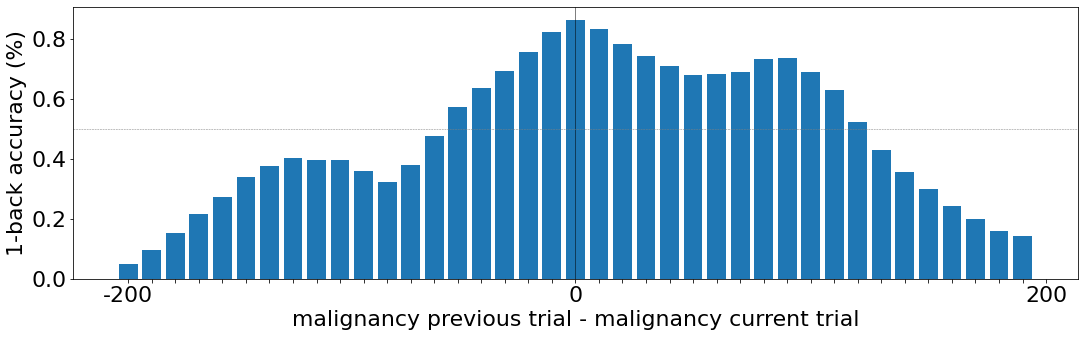

In [8]:
# PLOT 1: Similarity Barplot over all trials
y = data_per_bin['1back_accuracy']
x = data_per_bin.index
y_pos = np.arange(len(x))
plt.figure(figsize=(18, 5))
x_labels = ['']*(len(x)+1)
x_labels[0] = -200
x_labels[19] = 0
x_labels[39] = 200
plt.xticks(np.arange(len(x)+1),x_labels)
plt.bar(y_pos, y)
plt.ylabel('1-back accuracy (%)')
plt.xlabel('malignancy previous trial - malignancy current trial')
plt.axvline(x=19,linewidth=0.5, color='black')
plt.axhline(y=0.5,linewidth=0.5, color='grey', linestyle='--') #

plt.show()

# x-axis: -200: Previous image was very benign, 200: Previous image was very malignant
# y-axis: above 0.5 SD is apparent

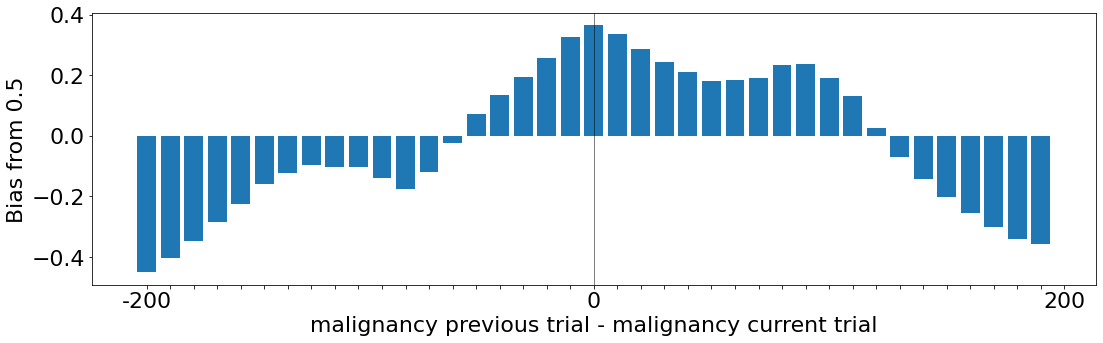

In [12]:
# PLOT 2: Similarity Barplot over all trials
y = data_per_bin['1back_accuracy']
y = y-0.5
x = data_per_bin.index
y_pos = np.arange(len(x))
plt.figure(figsize=(18, 5))
x_labels = ['']*(len(x)+1)
x_labels[0] = -200
x_labels[19] = 0
x_labels[39] = 200
plt.xticks(np.arange(len(x)+1),x_labels)
plt.bar(y_pos, y)
plt.ylabel('Bias from 0.5')
plt.xlabel('malignancy previous trial - malignancy current trial')
#plt.title('Bias towards previous image for different levels of similarity')

plt.axvline(x=19,linewidth=0.5, color='black')

plt.show()

# x-axis: -200: Previous image was very benign, 200: Previous image was very malignant
# y-axis: -0.5: Bias away from previous image, 0.5: Bias towards previous images 

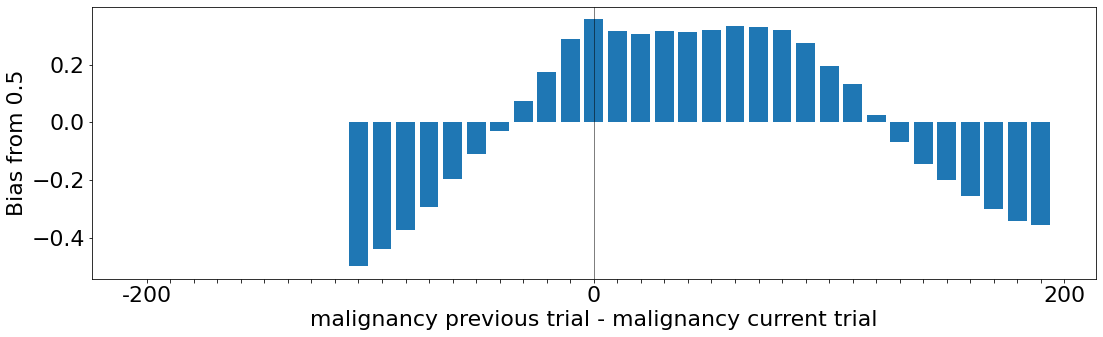

In [13]:
# PLOT 3: Similarity Barplot FOR NEVUS IN CURRENT TRIAL ONLY

nevus_only = data[data['current_correct_answer']== "['nevus']"]
data_per_bin_n = nevus_only.groupby(['similarity_bins']).mean()

y = data_per_bin_n['1back_accuracy']
y = y-0.5
y = y.fillna(0)
x = data_per_bin_n.index
y_pos = np.arange(len(x))
plt.figure(figsize=(18, 5))
x_labels = ['']*(len(x)+1)
x_labels[0] = -200
x_labels[19] = 0
x_labels[39] = 200
plt.xticks(np.arange(len(x)+1),x_labels)
plt.bar(y_pos, y)
plt.ylabel('Bias from 0.5')
plt.xlabel('malignancy previous trial - malignancy current trial')
#plt.title('Bias towards previous image for different levels of similarity: Benign images in current trial only')

plt.axvline(x=19,linewidth=0.5, color='black')

plt.show()

# x-axis: -200: Previous image was very benign, 200: Previous image was very malignant
# y-axis: -0.5: Bias away from previous image, 0.5: Bias towards previous images 

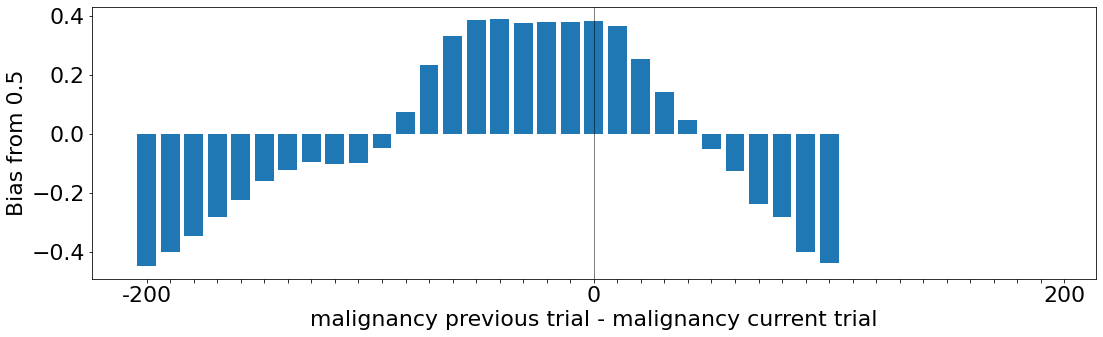

In [14]:
# PLOT 4: Similarity Barplot FOR MELANOMA IN CURRENT TRIAL ONLY

melanoma_only = data[data['current_correct_answer']== "['melanoma']"]
data_per_bin_m = melanoma_only.groupby(['similarity_bins']).mean()

y = data_per_bin_m['1back_accuracy']
y = y-0.5
y = y.fillna(0)
x = data_per_bin_m.index
y_pos = np.arange(len(x))
plt.figure(figsize=(18, 5))
x_labels = ['']*(len(x)+1)
x_labels[0] = -200
x_labels[19] = 0
x_labels[39] = 200
plt.xticks(np.arange(len(x)+1),x_labels)
plt.bar(y_pos, y)
plt.ylabel('Bias from 0.5')
plt.xlabel('malignancy previous trial - malignancy current trial')
#plt.title('Bias towards previous image for different levels of similarity: Malignant images in current trial only')

plt.axvline(x=19,linewidth=0.5, color='black')

plt.show()

# x-axis: -200: Previous image was very benign, 200: Previous image was very malignant
# y-axis: -0.5: Bias away from previous image, 0.5: Bias towards previous images 

In [ ]:
data.to_csv('prepped_data.csv')

In [4]:
from tqdm import tqdm

Times = pd.to_datetime(data['response_submitted_at'])
Times = [time.date() for time in Times]
User_ID = list(data['user_id'])

dict_usertime = {}
user_multi_entry = []
for user, time in tqdm(zip(User_ID, Times)):
    if user not in dict_usertime:
        dict_usertime[user] = time
    else:
        if dict_usertime[user] != time:
            user_multi_entry.append(user)

print(set(user_multi_entry))
print(len(set(user_multi_entry)))

756001it [00:00, 2098412.16it/s]

{57347, 38916, 49156, 59409, 45078, 49174, 49175, 63510, 34845, 51231, 34855, 28716, 53296, 30769, 36920, 49211, 49219, 49221, 43079, 43086, 49233, 43096, 47203, 49251, 63590, 51306, 43116, 51318, 36985, 49279, 34949, 53383, 43144, 53389, 49300, 63637, 63638, 49310, 30879, 22689, 39074, 57507, 49319, 184, 49344, 45254, 49352, 53452, 47309, 57549, 49359, 45270, 45271, 53462, 53465, 39130, 57561, 39138, 39140, 53477, 45290, 49392, 45300, 41210, 57601, 24841, 53517, 45333, 31007, 47397, 22824, 39212, 55596, 47407, 53554, 57651, 45368, 47420, 61760, 22857, 37193, 43338, 8524, 59721, 61773, 63821, 57682, 14681, 51547, 51549, 55647, 37217, 47458, 47460, 51556, 63844, 43371, 45422, 47471, 51567, 49521, 55666, 39286, 45431, 53639, 51603, 57749, 43420, 51612, 45470, 53670, 22960, 49597, 51646, 63937, 453, 41415, 53704, 63944, 53717, 49629, 51683, 49638, 45544, 63982, 57851, 63998, 47615, 43524, 47627, 49681, 23059, 27156, 2581, 61974, 53787, 53789, 45605, 51750, 51752, 64044, 43566, 43567, 4356